Libreries

In [17]:
import re
from sklearn import datasets, linear_model, tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    print(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Load data

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Load Dataset 

In [8]:
import random
import pandas as pd

filename = "/content/drive/MyDrive/ML/HomeWork_1_ML/mapping_traces_O0.csv"
db_map = pd.read_csv(filename, sep='\t')
db_map[["instructions", "source_line", "bug"]]
print('File loaded: %d samples.' %(len(db_map.instructions)))

id = random.randrange(0,len(db_map.instructions))
print("%d\n %s\n %s\n %s\n" %(id, db_map.instructions[id], db_map.source_line[id], db_map.bug[id]))

#Hint --> sum first two strings
db_map.instructions = db_map.instructions + db_map.source_line
print("%d\n %s\n %s\n" %(id, db_map.instructions[id], db_map.bug[id]))

File loaded: 100000 samples.
53949
 movq 0 l 99 8 
 ( *  l  8  ) = (  func  9  ( ( (  g  7  , ( (  g  7  < = ( (  safe  sub  func  uint 8  t  u  u  (  func  15  ( ( *  l  8  ) ,  func  20  ( &  l  2  ) , ( *  l  8  ) ,  g  48 0  ) , ( *  l  8  ) ) ) , ( *  l  8  ) ) ) & 255 ) ) ,  g  99 0  ) , &  l  2  , &  l  2  ) , ( *  l  8  ) ) ;
 1

53949
 movq 0 l 99 8 ( *  l  8  ) = (  func  9  ( ( (  g  7  , ( (  g  7  < = ( (  safe  sub  func  uint 8  t  u  u  (  func  15  ( ( *  l  8  ) ,  func  20  ( &  l  2  ) , ( *  l  8  ) ,  g  48 0  ) , ( *  l  8  ) ) ) , ( *  l  8  ) ) ) & 255 ) ) ,  g  99 0  ) , &  l  2  , &  l  2  ) , ( *  l  8  ) ) ;
 1



Vettorizzazione 

In [9]:
vectorizer_type = "count"                               # "hashing", "count" or "tfid"

if vectorizer_type == "hashing":
  vectorizer = HashingVectorizer(stop_words='english')  # multivariate
elif vectorizer_type == "count":
  vectorizer = CountVectorizer(stop_words='english')    # multinomial
elif vectorizer_type == "tfid":
  vectorizer = TfidfVectorizer(stop_words='english')

X_map = vectorizer.fit_transform(db_map.instructions)
y_map = db_map.bug

print(y_map)

print("X_map all shape", X_map.shape)
print("y_map all shape", y_map.shape)

0        0
1        1
2        0
3        1
4        0
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: bug, Length: 100000, dtype: int64
X_map all shape (100000, 1231)
y_map all shape (100000,)


Split Dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_map, y_map, test_size=0.25, random_state=16)

print("Train: %d - Test: %d" %(X_train.shape[0], X_test.shape[0]))

#id = random.randrange(0,X_train.shape[0])
#print('%d ' %(id))
#print('%d %s %s' %(id,str(y_train[id]),str(X_train[id])))


print(X_test)
print(y_test)

Train: 75000 - Test: 25000
  (0, 964)	3
  (0, 58)	3
  (0, 954)	3
  (0, 47)	3
  (0, 1110)	3
  (0, 976)	1
  (0, 1194)	2
  (0, 1003)	2
  (0, 1182)	1
  (0, 258)	2
  (0, 580)	6
  (0, 908)	3
  (0, 1031)	2
  (0, 562)	2
  (0, 534)	1
  (0, 136)	1
  (0, 311)	2
  (0, 476)	3
  (0, 903)	1
  (1, 1033)	1
  (1, 6)	1
  (1, 1082)	2
  (1, 996)	1
  (1, 1196)	1
  (1, 224)	2
  :	:
  (24999, 908)	16
  (24999, 909)	6
  (24999, 1041)	8
  (24999, 913)	6
  (24999, 947)	6
  (24999, 950)	5
  (24999, 930)	3
  (24999, 946)	9
  (24999, 1213)	2
  (24999, 1031)	1
  (24999, 1034)	7
  (24999, 1168)	1
  (24999, 1037)	3
  (24999, 929)	1
  (24999, 940)	2
  (24999, 1171)	1
  (24999, 910)	1
  (24999, 608)	2
  (24999, 1140)	1
  (24999, 1165)	1
  (24999, 1111)	1
  (24999, 1152)	1
  (24999, 1043)	1
  (24999, 1115)	1
  (24999, 1130)	1
45659    1
17115    1
77085    1
30386    1
55412    1
        ..
49287    0
78686    0
15251    0
80841    0
26220    0
Name: bug, Length: 25000, dtype: int64


Create and fit model

In [12]:
model_type = "bernoulli" 

if model_type == "bernoulli":
  model = BernoulliNB().fit(X_train, y_train)
  print('Bernoulli Model created')
elif model_type == "tree":
  model = tree.DecisionTreeClassifier(criterion = "gini", splitter = "best").fit(X_train, y_train)
  print('Tree Model created')
elif model_type == "ran_for":
  model = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)
  print('Random Forest Model created')
elif model_type == "neig":
  model = KNeighborsClassifier().fit(X_train, y_train)

#model.fit(X_train, y_train)

Bernoulli Model created


Evaluation

Vectorization type: count 
Model type: bernoulli
 
[[10889  1553]
 [ 5768  6790]]
45659    1
17115    1
77085    1
30386    1
55412    1
        ..
49287    0
78686    0
15251    0
80841    0
26220    0
Name: bug, Length: 25000, dtype: int64 [1 1 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.65      0.88      0.75     12442
           1       0.81      0.54      0.65     12558

    accuracy                           0.71     25000
   macro avg       0.73      0.71      0.70     25000
weighted avg       0.73      0.71      0.70     25000



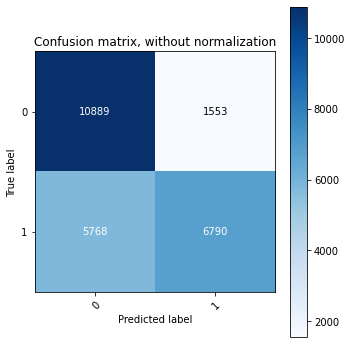

In [21]:
import numpy as np
print("Vectorization type: %s \nModel type: %s\n "%(vectorizer_type, model_type))

y_pred = model.predict(X_test)      #se uso gauss aggiungere .toArray() a X_test

cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
plt.rcParams["figure.figsize"] = (5,5)
class_names = np.array(["0","1"])
print(cm)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

print(classification_report(y_test, y_pred))

In [ ]:
#K-Fold Cross Validation 
"""cv = ShuffleSplit(n_splits=5, test_size=0.333, random_state=15)
scores = cross_val_score(model, X_map, y_map, cv=cv)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#model.score(X_test, y_test)"""

'cv = ShuffleSplit(n_splits=5, test_size=0.333, random_state=15)\nscores = cross_val_score(model, X_map, y_map, cv=cv)\nprint(scores)\nprint("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))\n\n#model.score(X_test, y_test)'

Load Dataset per il prediction

In [ ]:
filename = "/content/drive/MyDrive/HomeWork_1_ML/blind_test.csv"
db_pred = pd.read_csv(filename, sep='\t')
db_pred[["instructions", "source_line"]]
#print('File loaded: %d samples.' %(len(db_map.instructions)))

id = 544    #random.randrange(0,len(db_map.instructions))
#print("%d\n %s\n %s\n" %(id, db_pred.instructions[id], db_pred.source_line[id]))

#suggerimento --> unire le prime due stringhe
db_pred.instructions = db_pred.instructions + db_pred.source_line
#print("%d\n %s\n" %(id, db_pred.instructions[id]))



In [ ]:
#smsnew1 = np.array(db_pred.instructions)
xnew1 = vectorizer.transform(db_pred.instructions)
ynew1 = model.predict(xnew1)
print('%s\n %s\n ' %(db_pred.instructions,ynew1))


0       movl HIGHVAL MEM cmpl 7 MEM jne MEM volatile i...
1       movl MEM %eax subl 1 %eax movl %eax MEM jmp ME...
2       leaq l 53 72 %rax movq %rax l 58 31 int32t *  ...
3       leaq l 47 %rax movq %rax l 65 int32t *  l  65 ...
4       movq MEM %rax cmpl 0 MEM je MEM if ( ( *  g  3...
                              ...                        
9995         movl 9 l 51 76 int32t  l  45 69  = ( - 1 ) ;
9996    leaq l 21 %rdi movabsq "< `" %rsi movl HIGHVAL...
9997    movabsq HIGHVAL %rax movq %rax l 16 50 int8t *...
9998    movabsq HIGHVAL %rax movq %rax l 81 4 int32t *...
9999    movabsq HIGHVAL %rax movq %rax l 22 4 int32t *...
Name: instructions, Length: 10000, dtype: object
 [1 0 0 ... 0 0 1]
 


In [ ]:
file = open("/content/drive/MyDrive/HomeWork_1_ML/1785139.txt", "w"  )
str = np.array(ynew1)

print(collections.Counter(str))

for i in ynew1:
  file.write(("%s\n")%(i))
file.close()


Counter({0: 5316, 1: 4684})
